<a href="https://colab.research.google.com/github/CS7140/PA-11/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rajesh Sakhamuru

12-12-2020
# Learning Rate Decay

In [1]:
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from pprint import pprint

In [17]:
def func(x1, x2):
    return x1**2 + (2*x2)**2

def funcGrad(x1, x2):
    return (2*x1, 4*x2)

def stochasticGradientDescent(func, funcGrad, lr, lrDecay, x1, x2):
    grad1, grad2 = funcGrad(x1, x2)

    #randomness to simulate a larger more random dataset
    grad1 += tf.random.normal([1], 0.0, 1)
    grad2 += tf.random.normal([1], 0.0, 1)

    lr = lr * lrDecay()

    x1 = x1 - lr*grad1
    x2 = x2 - lr*grad2

    return (x1, x2)

def distanceFrom0(x1, x2):
    return math.sqrt((0-x1)**2 + (0-x2)**2)

In [4]:
def exponential():
    global ctr
    ctr += 1
    return math.exp(-0.1 * ctr)

def polynomial():
    global ctr
    ctr += 1
    return (1 + 0.1 * ctr)**(-0.5)

# Comparison
I tried constant, polynomial and exponential learning rate schedules for SGD and plotted the distance from (0,0) per iteration. 

What I can see is that the exponential decay, decayed far too quickly and even greatly increasing the number of epochs does not decrease the distance past a certain point because the learning rate is too small, making updates via gradient too small to make a difference in the weights. 

The constant learning rate got down to the lowest possible distance (accounting for the noise generated by the randomness) but still remained fairly volatile at the higher epochs because the learning rate did not change to a lower value as it got into the later epochs.

Polynomial decay found a nice balance here where it reached the lowest possible distance from (0, 0), but also was not volatile in the later decays showing a much smoother curve in the later epochs.

Final Distance From 0: 0.09024470464197656


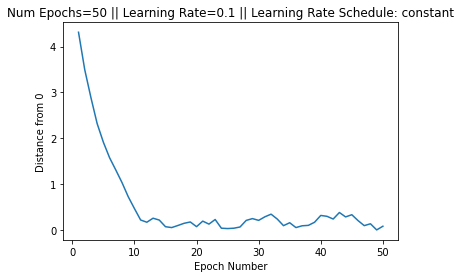

Final Distance From 0: 0.10393159438925019


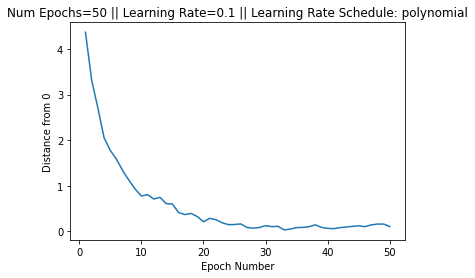

Final Distance From 0: 0.7539049454909982


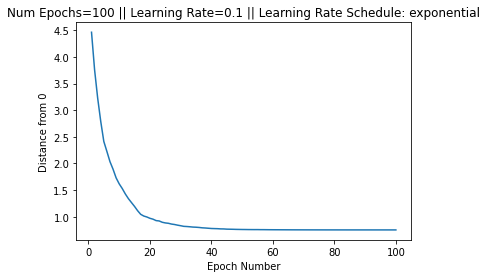

In [18]:
constant = lambda:1
poly = polynomial
expo = exponential

epochsLrList = [(50,0.1,constant,'constant'), (50,0.1,poly,'polynomial'), (100, 0.1,expo,'exponential')]

for epochs, lr, lrDecay, decayStr in epochsLrList:
    ctr = 1
    x1, x2= -5, -2

    results = [(x1, x2)]
    distFrom0 = []

    # optimal results are (0, 0)
    for epoch in range(epochs):
        x1, x2 = stochasticGradientDescent(func, funcGrad, lr, lrDecay, x1, x2)
        results.append((x1, x2))
        distFrom0.append(distanceFrom0(x1, x2))

    print('Final Distance From 0:',distFrom0[-1])

    plt.plot(range(1,epochs+1), distFrom0)
    plt.xlabel('Epoch Number')
    plt.ylabel('Distance from 0')
    plt.title("Num Epochs="+str(epochs)+" || Learning Rate="+str(lr)+" || Learning Rate Schedule: "+decayStr)
    plt.show()